In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed
from keras.initializers import RandomNormal
import warnings
import pickle
warnings.filterwarnings("ignore")

Using TensorFlow backend.


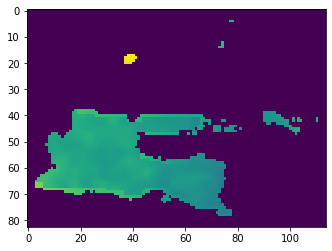

In [2]:
pickle_in = open("../Data_error/error_flatten.pickle","rb")
# data diload sudah dalam bentuk 1D
X = pickle.load(pickle_in)
# untuk menampilkan gambar data 1D -> 2D
plt.imshow(X[0].reshape(83,114))

In [3]:
X

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [4]:
df = X
data_1 = df[:-48]
data_2 = df[:-36]
data_3 = df[:-24]
data_4 = df[:-12]
data_5 = df
# data tahun 1983-2011
df=df[:-60]

In [5]:
# train -> data 1983-2011
train, test = df, df[-24:]

In [6]:
np.array(train).shape[0]/12

28.0

In [7]:
scaler = MinMaxScaler()
scaler.fit(train)
scaler.fit(data_4)
scaler.fit(test)
train = scaler.transform(train)
data_4 = scaler.transform(data_4)
test = scaler.transform(test)

In [8]:
n_input = 12
n_features = 9462
batch_size=12
# supervised data
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=batch_size)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=batch_size)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model = Sequential()
model.add(LSTM(60, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(70, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(80, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1), unit_forget_bias='zeros', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(90, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(110, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.add(Dropout(0.2))
model.add(Dense(n_features, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=1)))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 60)            2285520   
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 70)            36680     
_________________________________________________________________
dropout (Dropout)            (None, 12, 70)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                48320     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 90)                7290      
_________________________________________________________________
dropout_2 (Dropout)          (None, 90)                0

In [11]:
model.fit_generator(generator,epochs=90)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/90
27/27 [==============================] - 3s 108ms/step - loss: 0.3036 - mean_absolute_error: 0.3036
Epoch 2/90
27/27 [==============================] - 2s 59ms/step - loss: 0.0732 - mean_absolute_error: 0.0732
Epoch 3/90
27/27 [==============================] - 2s 62ms/step - loss: 0.0500 - mean_absolute_error: 0.0500
Epoch 4/90
27/27 [==============================] - 2s 62ms/step - loss: 0.0462 - mean_absolute_error: 0.0462
Epoch 5/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 6/90
27/27 [==============================] - 2s 59ms/step - loss: 0.0435 - mean_absolute_error: 0.0435
Epoch 7/90
27/27 [==============================] - 2s 59ms/step - loss: 0.0428 - mean_absolute_error: 0.0428
Epoch 8/90
27/27 [==============================] - 2s 59ms/step - loss: 0.0424 - mean_absolute_error: 0.0424
Epoch 9/90
27/27 [=========================

27/27 [==============================] - 2s 61ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 73/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 74/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 75/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 76/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0402 - mean_absolute_error: 0.0402
Epoch 77/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 78/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 79/90
27/27 [==============================] - 2s 59ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 80/90
27/27 [==============================] - 2s 60ms/step - loss: 0.0401 - mean_absolute_error: 0.0401
Epoch 81/90
2

In [12]:
model.evaluate_generator(validation_sequence)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.04390336945652962, 0.04390337]

In [13]:
pred_list = []

batch = train[-12:].reshape((1, n_input, n_features))
batch

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [14]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list = scaler.inverse_transform(pred_list)

# prediksi = (model.predict(batch)[0])

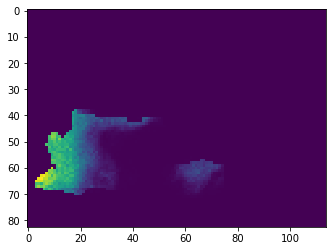

In [15]:
plt.imshow(pred_list[0].reshape(83,114))

In [16]:
train = df
test = df[-24:]

In [17]:
scaler.fit(train)
train = scaler.transform(train)
scaler.fit(test)
test = scaler.transform(test)

In [18]:
n_input = 12
n_features = 9462
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=12)
validation_sequence = TimeseriesGenerator(test, test, length=n_input, batch_size=12)

In [19]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
27/27 [==============================] - 2s 62ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 2/90
27/27 [==============================] - 2s 61ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 3/90
27/27 [==============================] - 2s 63ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 4/90
27/27 [==============================] - 2s 64ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 5/90
27/27 [==============================] - 2s 63ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 6/90
27/27 [==============================] - 2s 64ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 7/90
27/27 [==============================] - 2s 65ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 8/90
27/27 [==============================] - 2s 64ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 9/90
27/27 [==============================] - 2s 64ms/step - loss: 0.0206 - mean_absolute_error: 0.0206
Epoch 10/9

27/27 [==============================] - 2s 65ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 75/90
27/27 [==============================] - 2s 64ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 76/90
27/27 [==============================] - 2s 65ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 77/90
27/27 [==============================] - 2s 64ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 78/90
27/27 [==============================] - 2s 66ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 79/90
27/27 [==============================] - 2s 65ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 80/90
27/27 [==============================] - 2s 64ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 81/90
27/27 [==============================] - 2s 65ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 82/90
27/27 [==============================] - 2s 65ms/step - loss: 0.0205 - mean_absolute_error: 0.0205
Epoch 83/90
2

In [20]:
model.evaluate_generator(validation_sequence)

[0.044007446616888046, 0.044007447]

In [21]:
pred_list = []

batch = data_4[-60:-48].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
batch1 = data_4[-48:-36].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch1)[0]) 
    batch1 = np.append(batch1[:,1:,:],[[pred_list[i]]],axis=1)
    
batch2 = data_4[-36:-24].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch2)[0]) 
    batch2 = np.append(batch2[:,1:,:],[[pred_list[i]]],axis=1)
    
# data tahun 2014 untuk memprediksi tahun 2015
batch3 = data_4[-24:-12].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch3)[0]) 
    batch3 = np.append(batch3[:,1:,:],[[pred_list[i]]],axis=1)

# data tahun 2015 untuk memprediksi tahun 2016
batch4 = data_4[-12:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch4)[0]) 
    batch4 = np.append(batch4[:,1:,:],[[pred_list[i]]],axis=1)

In [22]:
batch

array([[[1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
         1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
        [1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
         1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
        [1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
         1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
        ...,
        [1.15796247e-05, 1.08742615e-05, 1.09922485e-05, ...,
         1.13338665e-05, 9.88184729e-06, 1.15720622e-05],
        [1.15736948e-05, 1.08684562e-05, 1.09863795e-05, ...,
         1.13277729e-05, 9.87665499e-06, 1.15660378e-05],
        [1.15828825e-05, 1.08774775e-05, 1.09955299e-05, ...,
         1.13372289e-05, 9.88466491e-06, 1.15753846e-05]]])

In [23]:
pred_list = scaler.inverse_transform(pred_list)
pred_list

array([[1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
        1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
       [1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
        1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
       [1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
        1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
       ...,
       [1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
        1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
       [1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
        1.13377273e-05, 9.88510783e-06, 1.15758703e-05],
       [1.15833791e-05, 1.08779232e-05, 1.09960338e-05, ...,
        1.13377273e-05, 9.88510783e-06, 1.15758703e-05]])

In [24]:
pred_list.shape

(60, 9462)

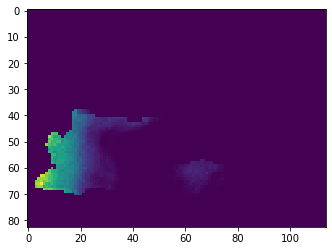

In [25]:
plt.imshow(pred_list[0].reshape(83,114))

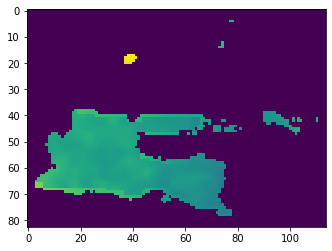

In [26]:
df_asli = data_1
plt.imshow(df_asli[0].reshape(83,114))

In [27]:
max(pred_list[10])

0.09087853321603756

In [28]:
max(df_asli[10])

0.017539296

In [29]:
# MAE untuk semua data
pred_list[pred_list<0]=0
pred_list_new=[]
df_asli_new=[]
no=0
df_asli=np.array(df_asli)
# for pred in pred_list:
#     pred_list_new.append(list(filter(lambda x: x != 0, pred_list[no])))
#     df_asli_new.append(list(filter(lambda x: x != 0, df_asli[no])))
#     no+=1
    
pred_list_new=np.array(pred_list_new)
df_asli_new=np.array(df_asli_new)

# pred_list.shape
# np.array(df_asli_new).shape

mae=[]
no=0
for pred1 in pred_list:
    mae_ = df_asli[no]-pred1
    mae_ = np.average(mae_)
    mae.append(mae_)
    no+=1

In [30]:
mae

[0.20185629584795212,
 0.19587472706778805,
 0.1335328547603698,
 0.030152110133528174,
 -0.002119352016342266,
 0.011420339633761531,
 0.005623172327900096,
 0.015734573929266145,
 0.31071776667327505,
 0.020413167344057462,
 -0.0021139339178858534,
 0.03749986974027757,
 0.0781881168941784,
 0.11492366206004825,
 0.10092203824979094,
 0.026847875475357143,
 -0.002119352016342266,
 0.00573104471340253,
 0.018278729403276246,
 0.008394341413872772,
 0.18254725423302304,
 0.009390572208416747,
 -0.0020499984525240893,
 0.017338514340547517,
 0.05721939716628265,
 0.05091408308092385,
 0.06302511461714551,
 0.00834269638918954,
 -0.002119352016342266,
 0.005237314703838726,
 0.008583527764206565,
 0.022488128478110374,
 0.0730208418522496,
 0.008411264332365638,
 -0.0017192028910854227,
 -0.002119320509358983,
 0.06063713631682242,
 0.022889316589535417,
 0.017839536476442656,
 -0.002119352016342266,
 -0.002119352016342266,
 -0.002119352016342266,
 -0.0017836603045018275,
 0.007402863711

In [31]:
# pred_list_new

Pred_rata= []
for i in range(0,60):
	Pred_rata.append((pred_list[i].mean()))


In [32]:
df_asli_rata= []
for i in range(0,60):
	df_asli_rata.append((df_asli[i].mean()))

In [33]:
Pred_rata

[0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119113701534039,
 0.002118738487275505,
 0.002119320509358983,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119117565833901,
 0.00211873882956766,
 0.002119320558016371,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.0021184800690635,
 0.002118738487275505,
 0.002119320509358983,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.002119352016342266,
 0.00211935201

In [34]:
df_asli_rata


[0.20397566,
 0.19799407,
 0.13565221,
 0.032271463,
 0.0,
 0.013539691,
 0.007742524,
 0.017853927,
 0.3128371,
 0.02253228,
 4.8045695e-06,
 0.03961919,
 0.080307476,
 0.11704302,
 0.1030414,
 0.028967226,
 0.0,
 0.007850396,
 0.020398082,
 0.010513693,
 0.1846666,
 0.0115096895,
 6.874037e-05,
 0.019457834,
 0.059338752,
 0.053033434,
 0.065144464,
 0.010462048,
 0.0,
 0.0073566665,
 0.010702879,
 0.024607481,
 0.07514019,
 0.010529744,
 0.00039953558,
 0.0,
 0.062756486,
 0.02500867,
 0.019958887,
 0.0,
 0.0,
 0.0,
 0.00033569173,
 0.009522216,
 0.009292673,
 0.0016805856,
 0.0002217452,
 1.3502024e-05,
 0.17696069,
 0.18594149,
 0.19720568,
 0.040911835,
 0.0,
 0.022085713,
 0.03119794,
 0.045924917,
 0.2649516,
 0.028108876,
 0.00019953931,
 5.2411167e-05]

In [35]:
# membuat index tanggal, agar mempudah dalam proses plotting data
awal = "2012-1"
awal = pd.to_datetime(awal)
from pandas.tseries.offsets import DateOffset
add_dates = [awal + DateOffset(months=x) for x in range(0,60) ]
add_dates

[Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-02-01 00:00:00'),
 Timestamp('2012-03-01 00:00:00'),
 Timestamp('2012-04-01 00:00:00'),
 Timestamp('2012-05-01 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2012-08-01 00:00:00'),
 Timestamp('2012-09-01 00:00:00'),
 Timestamp('2012-10-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2012-12-01 00:00:00'),
 Timestamp('2013-01-01 00:00:00'),
 Timestamp('2013-02-01 00:00:00'),
 Timestamp('2013-03-01 00:00:00'),
 Timestamp('2013-04-01 00:00:00'),
 Timestamp('2013-05-01 00:00:00'),
 Timestamp('2013-06-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2013-08-01 00:00:00'),
 Timestamp('2013-09-01 00:00:00'),
 Timestamp('2013-10-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-12-01 00:00:00'),
 Timestamp('2014-01-01 00:00:00'),
 Timestamp('2014-02-01 00:00:00'),
 Timestamp('2014-03-01 00:00:00'),
 Timestamp('2014-04-01 00:00:00'),
 Timestamp('2014-05-

In [36]:
len(add_dates)


60

In [37]:
len(Pred_rata)


60

In [38]:
len(df_asli_rata)

60

In [39]:
dict = {'bulan': add_dates, 'data ':mae}
df = pd.DataFrame(dict)

In [40]:
df

,bulan,data
0,2012-01-01,0.201856
1,2012-02-01,0.195875
2,2012-03-01,0.133533
3,2012-04-01,0.030152
4,2012-05-01,-0.002119
5,2012-06-01,0.011420
6,2012-07-01,0.005623
7,2012-08-01,0.015735
8,2012-09-01,0.310718
9,2012-10-01,0.020413


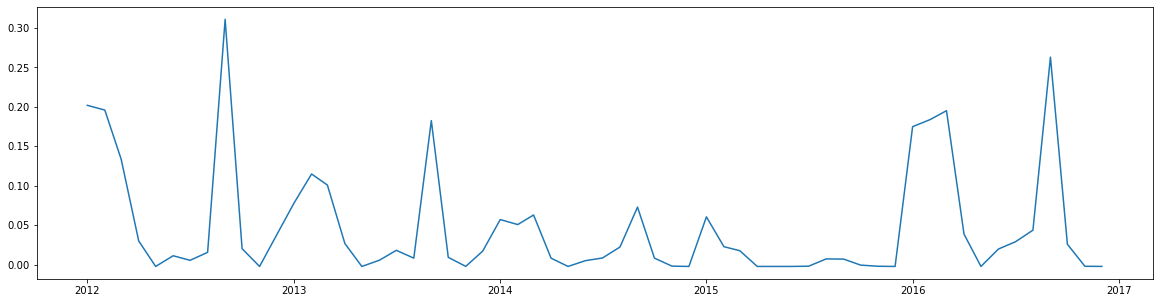

In [41]:
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index,df)

In [42]:
dict = {'bulan': add_dates, 'data prediksi':Pred_rata, 'data asli':df_asli_rata}
df = pd.DataFrame(dict)
df


,bulan,data prediksi,data asli
0,2012-01-01,0.002119,0.203976
1,2012-02-01,0.002119,0.197994
2,2012-03-01,0.002119,0.135652
3,2012-04-01,0.002119,0.032271
4,2012-05-01,0.002119,0.000000
5,2012-06-01,0.002119,0.013540
6,2012-07-01,0.002119,0.007743
7,2012-08-01,0.002119,0.017854
8,2012-09-01,0.002119,0.312837
9,2012-10-01,0.002119,0.022532


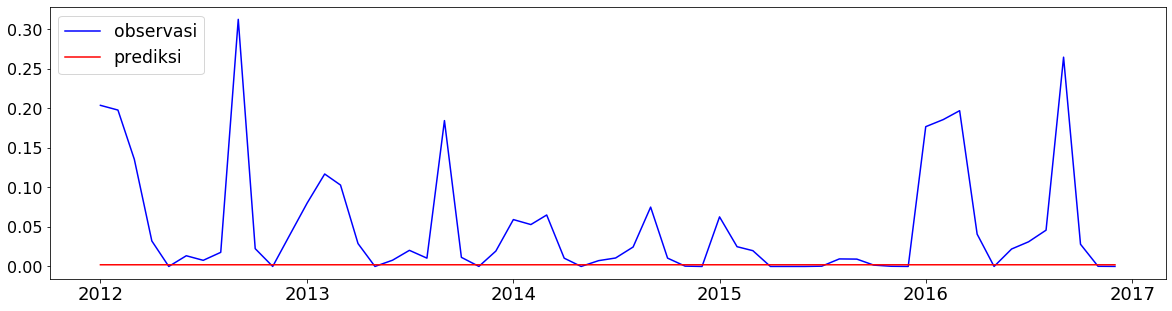

In [43]:
# df_asli = data_4
df = df.set_index("bulan")
plt.figure(figsize=(20, 5))
plt.plot(df.index, df_asli_rata[-60:], color='b', label="observasi")
plt.plot(df.index, Pred_rata[-60:], color='r', label="prediksi")
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

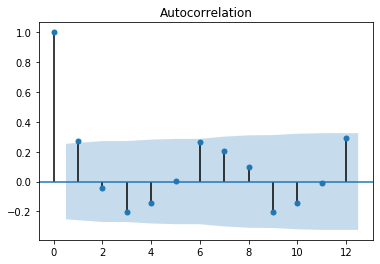

In [44]:
# # Time series data

# data = mae

 

# # Plot autocorrelation

# plt.acorr(data, maxlags=12)

 

# # Add labels to autocorrelation plot

# plt.title('Autocorrelation of LSTM')

# plt.xlabel('Lag')

# plt.ylabel('Autocorrelation')

 

# # Display the autocorrelation plot

# plt.show()

import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(mae, lags=12 , alpha=0.05)
acf.show()

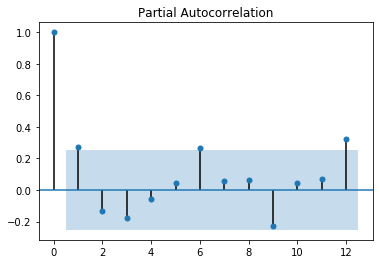

In [45]:
pacf = smt.graphics.plot_pacf(mae, lags=12 , alpha=0.05)
pacf.show()

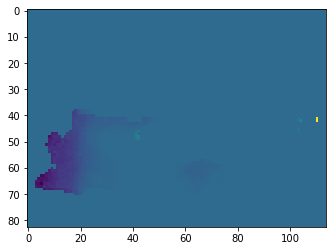

In [46]:
plt.imshow((df_asli[59]-pred_list[59]).reshape(83,114))

In [47]:
sum(mae)/60

0.04799561584517576

In [48]:
from skimage import io
# io.imsave('NewRaster/201201.tif', pred_list[0].reshape(83,114))

In [49]:
pred_list[pred_list==0]=-9999

In [50]:
no=0
for pred in pred_list:
    if(add_dates[no].month<10):
        nama_file = 'Raster_10/'+str(add_dates[no].year)+'0'+str(add_dates[no].month)+'.tif'
    else:
        nama_file = 'Raster_10/'+str(add_dates[no].year)+str(add_dates[no].month)+'.tif'
            
    io.imsave(nama_file, pred_list[no].reshape(83,114))
    no+=1
nama_file

'Raster_10/201612.tif'

In [51]:
model.save('LSTM607080DENSE90100110_adam_seed1.h5')